In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import datetime
from datetime import date
pysqldf = lambda q: sqldf(q, globals())


In [2]:
url='https://raw.githubusercontent.com/PhiPhuongUyen/Team-5/main/marketing_campaign.csv'
df=pd.read_csv(url,sep="\t") 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df=df.dropna()
print("After removing missing values:",len(df))

After removing missing values: 2216


In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
last_date = date(2014,10, 4)
df['Seniority']=pd.to_datetime(df['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
df['Seniority'] = pd.to_numeric(df['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30 
#Dates of the newest and oldest recorded customer
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

C:\Users\admin\AppData\Local\Temp\ipykernel_10636\701061519.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [6]:
pysqldf("SELECT Dt_Customer,Wines,Gold,Sweets,Fish,Meat,Fruits\
        FROM df")

,Dt_Customer,Wines,Gold,Sweets,Fish,Meat,Fruits
0,2012-04-09 00:00:00.000000,635,88,88,172,546,88
1,2014-08-03 00:00:00.000000,11,6,1,2,6,1
2,2013-08-21 00:00:00.000000,426,42,21,111,127,49
3,2014-10-02 00:00:00.000000,11,5,3,10,20,4
4,2014-01-19 00:00:00.000000,173,15,27,46,118,43
...,...,...,...,...,...,...,...
2211,2013-06-13 00:00:00.000000,709,247,118,42,182,43
2212,2014-10-06 00:00:00.000000,406,8,0,0,30,0
2213,2014-01-25 00:00:00.000000,908,24,12,32,217,48
2214,2014-01-24 00:00:00.000000,428,61,30,80,214,30


In [7]:
query = """
    SELECT strftime('%Y', Dt_Customer) AS Year,
           SUM(Wines) AS Total_Wines,
           SUM(Gold) AS Total_Gold,
           SUM(Sweets) AS Total_Sweets,
           SUM(Fish) AS Total_Fish,
           SUM(Meat) AS Total_Meat,
           SUM(Fruits) AS Total_Fruits
    FROM df
    WHERE Dt_Customer >= '2012-07-30' AND Dt_Customer <= '2014-06-29'
    GROUP BY strftime('%Y', Dt_Customer)
"""

# Thực thi truy vấn SQL
result = sqldf(query)

print(result)

   Year  Total_Wines  Total_Gold  Total_Sweets  Total_Fish  Total_Meat  \
0  2012       150386       20577         12115       16888       76262   
1  2013       352735       53787         31322       42852      194855   
2  2014       105627       13378         10223       14498       62208   

   Total_Fruits  
0         11114  
1         30806  
2         10137  


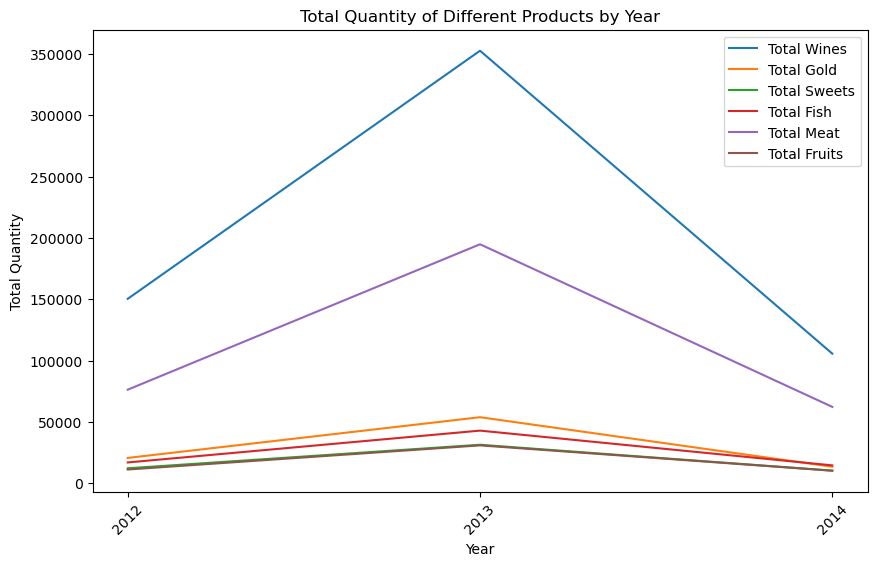

In [8]:
import matplotlib.pyplot as plt

# Chỉ lấy các tháng cụ thể
# selected_months = ['2012-07', '2012-11', '2013-03', '2013-07', '2013-11', '2014-03', '2014-06']

# Lọc kết quả theo các tháng cụ thể
# selected_result = result[result['Month'].isin(selected_months)]
# Tạo biểu đồ line chart
plt.figure(figsize=(10, 6))
plt.plot(result['Year'], result['Total_Wines'], label='Total Wines')
plt.plot(result['Year'], result['Total_Gold'], label='Total Gold')
plt.plot(result['Year'], result['Total_Sweets'], label='Total Sweets')
plt.plot(result['Year'], result['Total_Fish'], label='Total Fish')
plt.plot(result['Year'], result['Total_Meat'], label='Total Meat')
plt.plot(result['Year'], result['Total_Fruits'], label='Total Fruits')

# plt.xlabel('Month')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.title('Total Quantity of Different Products by Year')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [9]:
# Load dữ liệu vào DataFrame
# Chuyển đổi cột "Dt_Customer" thành kiểu dữ liệu datetime (nếu cần thiết)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Tạo cột mới "Year" từ cột "Dt_Customer"
df['Year'] = df['Dt_Customer'].dt.year

# Tính tổng thu nhập (income) theo từng năm
income_by_year = df.groupby('Year')['Income'].sum()

# In kết quả
print(income_by_year)


Year
2012    25063616.0
2013    61502804.0
2014    29213489.0
Name: Income, dtype: float64


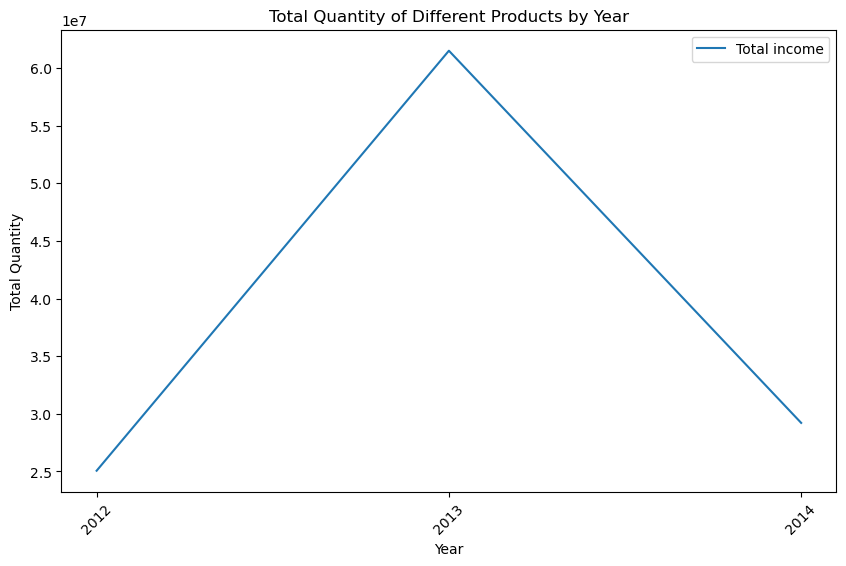

In [10]:
import matplotlib.pyplot as plt

# Chỉ lấy các tháng cụ thể
# selected_months = ['2012-07', '2012-11', '2013-03', '2013-07', '2013-11', '2014-03', '2014-06']

# Lọc kết quả theo các tháng cụ thể
# selected_result = result[result['Month'].isin(selected_months)]
# Tạo biểu đồ line chart
plt.figure(figsize=(10, 6))
plt.plot(result['Year'], income_by_year, label='Total income')
# plt.xlabel('Month')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.title('Total Quantity of Different Products by Year')
plt.legend()
plt.xticks(rotation=45)
plt.show()
